# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
from MFLUSolution import LUSolution, LUGASolution

In [3]:
from selection_and_operators.mutation import swap_stages_slots_mutation, inversion_mutation, shuffle_mutation
from selection_and_operators.crossover import cycle_crossover, partially_matched_crossover, swap_time_slots_crossover
from selection_and_operators.selection import ranking_selection, tournament_selection
from library.algorithm import genetic_algorithm

In [4]:
from experiment import run_experiment

# (Espaço para testes, depois é apagado)

In [4]:
import random
repr = []
artists = list(range(35))
random.shuffle(artists)
repr = [artists[i * 7:(i + 1) * 7] for i in range(5)]
repr

[[23, 6, 22, 19, 14, 12, 25],
 [3, 30, 29, 17, 24, 0, 2],
 [13, 10, 28, 34, 27, 11, 1],
 [20, 9, 18, 7, 8, 33, 21],
 [16, 5, 26, 15, 4, 32, 31]]

In [5]:
solution= LUSolution(repr=repr)

In [6]:
solution

[[23, 6, 22, 19, 14, 12, 25], [3, 30, 29, 17, 24, 0, 2], [13, 10, 28, 34, 27, 11, 1], [20, 9, 18, 7, 8, 33, 21], [16, 5, 26, 15, 4, 32, 31]]

In [7]:
solution=LUGASolution(
        crossover_function=cycle_crossover,
        mutation_function=swap_stages_slots_mutation,
        repr=repr
    )

In [8]:
solution

[[23, 6, 22, 19, 14, 12, 25], [3, 30, 29, 17, 24, 0, 2], [13, 10, 28, 34, 27, 11, 1], [20, 9, 18, 7, 8, 33, 21], [16, 5, 26, 15, 4, 32, 31]]

In [9]:
solution.fitness()

0.5641482988630827

In [10]:
solution

[[23, 6, 22, 19, 14, 12, 25], [3, 30, 29, 17, 24, 0, 2], [13, 10, 28, 34, 27, 11, 1], [20, 9, 18, 7, 8, 33, 21], [16, 5, 26, 15, 4, 32, 31]]

In [11]:
solution.mutation(mut_prob=0)

[[23, 6, 22, 19, 14, 12, 25], [3, 30, 29, 17, 24, 0, 2], [13, 10, 28, 34, 27, 11, 1], [20, 9, 18, 7, 8, 33, 21], [16, 5, 26, 15, 4, 32, 31]]

In [6]:
solution_new=LUGASolution(
        crossover_function=partially_matched_crossover,
        mutation_function=swap_stages_slots_mutation)

In [7]:
solution_new

[[6, 31, 5, 22, 9, 19, 3], [13, 33, 11, 26, 2, 17, 10], [27, 7, 18, 12, 15, 34, 16], [14, 29, 30, 24, 0, 23, 21], [32, 20, 28, 4, 8, 25, 1]]

In [9]:
solution_new.crossover(solution_new)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
offspring1 after index 0: [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
offspring2 after index 0: [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


offspring1 after index 1: [6, 31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
offspring2 after index 1: [6, 31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


offspring1 after index 2: [6, 31, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
offspring2 after index 2: [6, 31, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 34, 16,

([[6, 31, 5, 22, 9, 19, 3], [13, 33, 11, 26, 2, 17, 10], [27, 7, 18, 12, 15, 34, 16], [14, 29, 30, 24, 0, 23, 21], [32, 20, 28, 4, 8, 25, 1]],
 [[6, 31, 5, 22, 9, 19, 3], [13, 33, 11, 26, 2, 17, 10], [27, 7, 18, 12, 15, 34, 16], [14, 29, 30, 24, 0, 23, 21], [32, 20, 28, 4, 8, 25, 1]])

# 2. Testing different parameters for GA

Baseline parameters:
- POP_SIZE = 50, 
- CROSSOVER_FUNCTION = cycle_crossover,
- MUTATION_FUNCTION = shuffle_mutation,
- NUMBER_OF_TESTS=30,
- MAX_GEN=100,
- S_RANKING_SELECTION=1.5,
- K_TOURNEMENT_SELECTION=5,
- SELECTION_ALGORITHM=tournament_selection,
- XO_PROB=0.9,
- MUT_PROB=0.4,
- MUT_MAX_WINDOW_SIZE=5, 
- ELITISM = True,
- VERBOSE = False

### 1st test - crossover and mutation operators:

Operators to test:

- Mutation: swap_slots_mutation, inversion_mutation, shuffle_mutation
- Crossover: cycle_crossover, partially_matched_crossover, swap_column_crossover

In [5]:
mutation_functions = [swap_stages_slots_mutation, inversion_mutation, shuffle_mutation]
crossover_functions = [partially_matched_crossover, swap_time_slots_crossover]

In [ ]:
all_results=[]

for mut in mutation_functions:
    for xo in crossover_functions:
        experiment_name = f"{mut.__name__}__{xo.__name__}"
        print(f"\n\nRunning experiment: {experiment_name}")
        
        result = run_experiment(
            EXPERIMENT_NAME=experiment_name,
            MUTATION_FUNCTION=mut,
            CROSSOVER_FUNCTION=xo,
            MAX_GEN=2, # parametros só para testwe
            NUMBER_OF_TESTS=2 # parametros só para teste
        )

        all_results.append(result)

Running experiment: swap_stages_slots_mutation__partially_matched_crossover
Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.6617840239544094
Final best individual in generation 2: 0.6652118889337765
Iteration 1 of the genetic algorithm

Final best individual in generation 1: 0.674984521790627
Final best individual in generation 2: 0.6928940784667437
Running experiment: swap_stages_slots_mutation__swap_time_slots_crossover
Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.7093460421586095
Final best individual in generation 2: 0.7093460421586095
Iteration 1 of the genetic algorithm

Final best individual in generation 1: 0.7066463073368258
Final best individual in generation 2: 0.7148171667786704
Running experiment: inversion_mutation__partially_matched_crossover
Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.6756002950905501
Final best individual in generation 2: 0.7051145568155519
Iteration 1 o

C:\Users\Carolina\AppData\Local\Temp\ipykernel_20396\1977070370.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


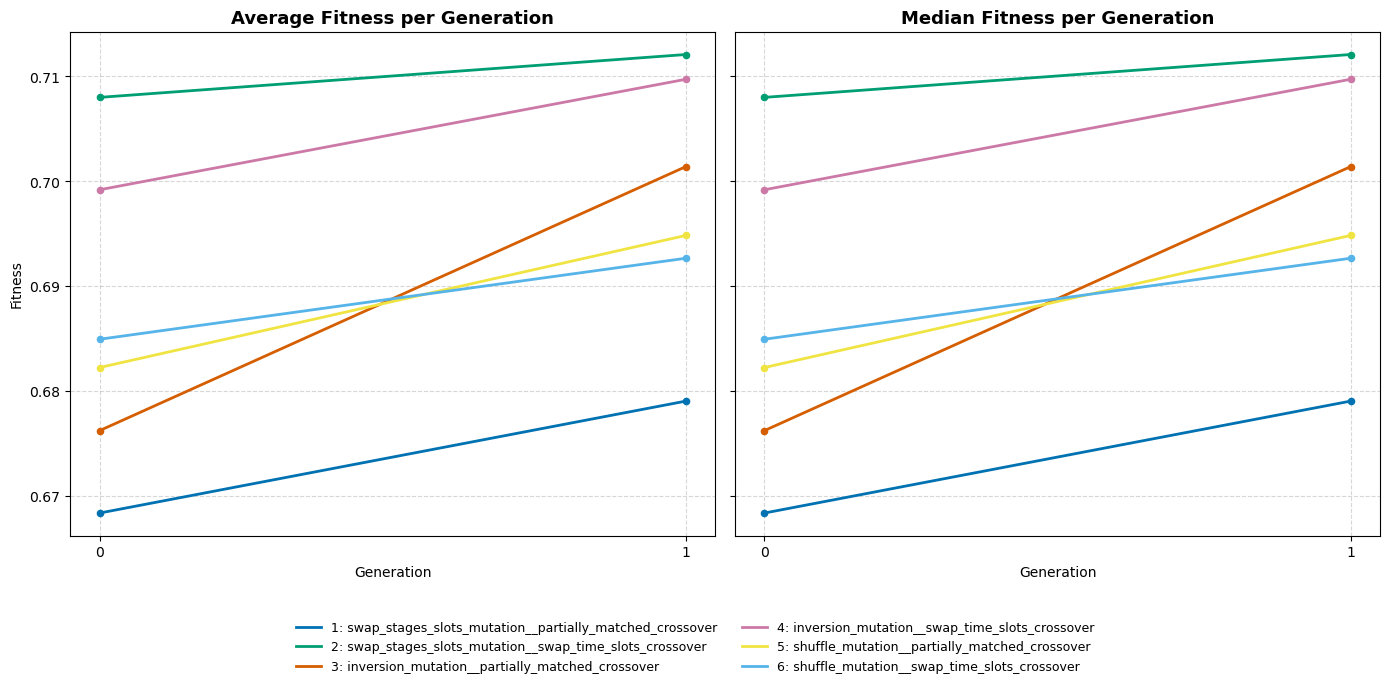

In [ ]:
plt.style.use("seaborn-colorblind")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
generation_order = sorted(all_results[0]['stats_df']['Generation'].unique())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot average fitness
for i, result in enumerate(all_results):
    label = f"{i+1}: {result['name']}"
    ax1.plot(result["stats_df"]["Generation"], result["fitness_avg"], label=label, color=colors[i % len(colors)], linewidth=2)
    ax1.scatter(generation_order, result["fitness_avg"], s=20, zorder=5, color=colors[i % len(colors)])

ax1.set_title("Average Fitness per Generation", fontsize=13, weight='bold')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xticks(range(len(generation_order)))
ax1.set_xticklabels(generation_order)

# Plot median fitness
for i, result in enumerate(all_results):
    ax2.plot(result["stats_df"]["Generation"], result["fitness_median"], label=f"{i+1}: {result['name']}", color=colors[i % len(colors)], linewidth=2)
    ax2.scatter(generation_order, result["fitness_median"], s=20, zorder=5, color=colors[i % len(colors)])

ax2.set_title("Median Fitness per Generation", fontsize=13, weight='bold')
ax2.set_xlabel("Generation")
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_xticks(range(len(generation_order)))
ax2.set_xticklabels(generation_order)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=9, frameon=False)

plt.tight_layout()
plt.show()


C:\Users\Carolina\AppData\Local\Temp\ipykernel_20396\2176879617.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


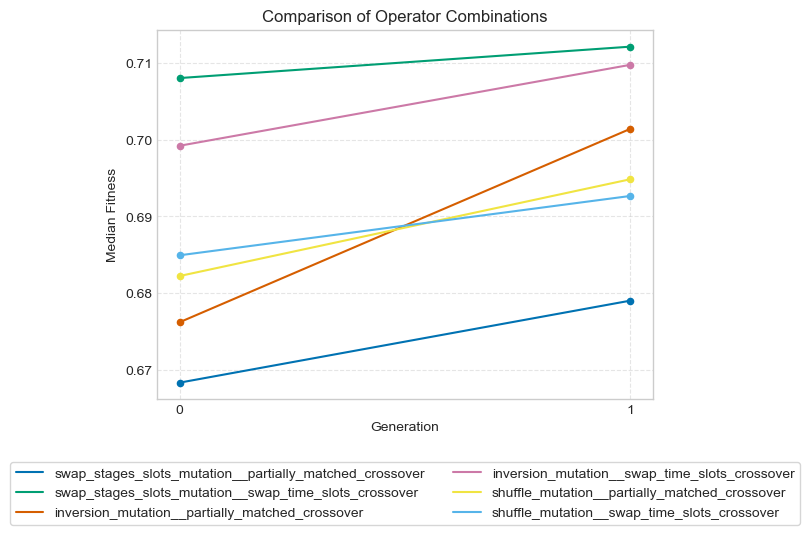

In [ ]:
for result in all_results:
    plt.plot(
        result["stats_df"]["Generation"],
        result["fitness_median"],
        label=result["name"]
    )
    plt.scatter(
        generation_order,
        result["fitness_median"],
        zorder=5,              
        s=20                  
    )

plt.style.use("seaborn-colorblind")
plt.xlabel("Generation")
plt.xticks(ticks=range(len(generation_order)), labels=generation_order)
plt.ylabel("Median Fitness")
plt.title("Comparison of Operator Combinations")

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,  
    frameon=True
)
plt.grid(linestyle='--', alpha=0.5)
plt.show()


C:\Users\Carolina\AppData\Local\Temp\ipykernel_20396\1226772392.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


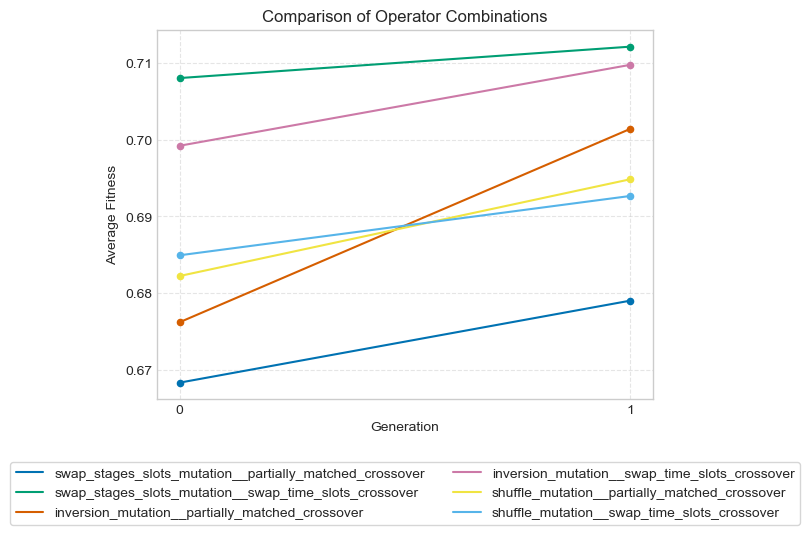

In [ ]:
for result in all_results:
    plt.plot(
        result["stats_df"]["Generation"],
        result["fitness_avg"],
        label=result["name"]
    )
    plt.scatter(
        generation_order,
        result["fitness_avg"],
        zorder=5,              
        s=20                  
    )

plt.style.use("seaborn-colorblind")
plt.xlabel("Generation")
plt.xticks(ticks=range(len(generation_order)), labels=generation_order)
plt.ylabel("Average Fitness")
plt.title("Comparison of Operator Combinations")

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,  
    frameon=True
)
plt.grid(linestyle='--', alpha=0.5)
plt.show()


In [10]:
fitness_arrays=[]
for result in all_results:

    fitness_arrays.append(result['fitness_array'])
print(fitness_arrays)

[array([[0.66178402, 0.66521189],
       [0.67498452, 0.69289408]]), array([[0.70934604, 0.70934604],
       [0.70664631, 0.71481717]]), array([[0.6756003 , 0.70511456],
       [0.6768783 , 0.6976859 ]]), array([[0.69869721, 0.69869721],
       [0.69968733, 0.72074771]]), array([[0.68976923, 0.7030063 ],
       [0.6747334 , 0.6866737 ]]), array([[0.67838263, 0.68530387],
       [0.69151107, 0.70002884]])]


C:\Users\Carolina\AppData\Local\Temp\ipykernel_20396\1881134263.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


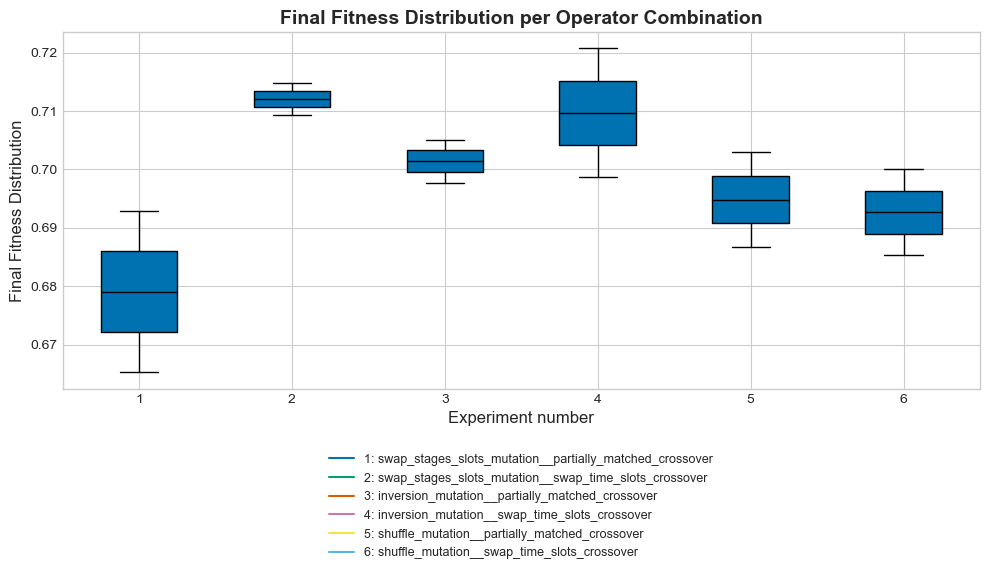

In [11]:
operator_names = [result["name"] for result in all_results]

final_values_by_operator = [arr[:, -1] for arr in fitness_arrays]

# Plot setup
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10, 6))

positions = list(range(1, len(operator_names) + 1))
box = plt.boxplot(final_values_by_operator, patch_artist=True, positions=positions, medianprops=dict(color='black') )

plt.xticks(positions, labels=[str(i) for i in positions], fontsize=10)
plt.xlabel("Experiment number", fontsize=12)
plt.ylabel("Final Fitness Distribution", fontsize=12)
plt.title("Final Fitness Distribution per Operator Combination", fontsize=14, weight='bold')

for i, name in enumerate(operator_names, start=1):
    plt.plot([], [], label=f"{i}: {name}")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fontsize=9, ncol=1, frameon=False)

plt.tight_layout()
plt.show()

### Test crossover and mutation probabilities

In [ ]:
mutation_probabilities=[random.uniform(0, 1/3), random.uniform(1/3, 2/3), random.uniform(2/3, 1)]
crossover_probabilities =[random.uniform(0, 1/3), random.uniform(1/3, 2/3), random.uniform(2/3, 1)]

In [ ]:
all_results=[]

for mut in mutation_probabilities:
    for xo in crossover_probabilities:
        experiment_name = f"mutation_prob:{mut}__crossover_prob{xo}"
        print(f"Running experiment: {experiment_name}")
        
        result = run_experiment(
            EXPERIMENT_NAME=experiment_name,
            MUTATION_FUNCTION=mut,
            CROSSOVER_FUNCTION=xo,
            MAX_GEN=40, # parametros só para testwe
            NUMBER_OF_TESTS=2 # parametros só para teste
        )

        all_results.append(result)

----------------------------------------------------------------

## CÓDIGO PARA APAGAR


In [ ]:
best_solutions_test1 = []
fitness_history_test1 = []

for i in range(NUMBER_OF_TESTS):

    print(f'Iteration {i} of the genetic algorithm\n')
    
    best_solution, fitness_history = genetic_algorithm(
        initial_population=initial_population,
        max_gen=MAX_GEN,
        selection_algorithm=SELECTION_ALGORITHM,
        k_tournment_selection=K_TOURNEMENT_SELECTION,
        maximization = True,
        xo_prob = XO_PROB,
        mut_prob = MUT_PROB,
        mut_max_window_size=MUT_MAX_WINDOW_SIZE,
        elitism = True,
        verbose = False,
    )

    best_solutions_test1.append(best_solution)
    fitness_history_test1.append(best_solution.fitness())


Final best individual in generation 1: 0.6838529241097527
Final best individual in generation 2: 0.6838529241097527
Final best individual in generation 3: 0.6915038610725596
Final best individual in generation 4: 0.6915038610725596
Final best individual in generation 5: 0.7201295581753574
Final best individual in generation 6: 0.7201295581753574
Final best individual in generation 7: 0.7216017595633901
Final best individual in generation 8: 0.7216017595633901
Final best individual in generation 9: 0.7216017595633901
Final best individual in generation 10: 0.741729835362431
Final best individual in generation 1: 0.6763154244898667
Final best individual in generation 2: 0.6948754898044959
Final best individual in generation 3: 0.6948754898044959
Final best individual in generation 4: 0.6948754898044959
Final best individual in generation 5: 0.6948754898044959
Final best individual in generation 6: 0.6948754898044959
Final best individual in generation 7: 0.6948754898044959
Final best ind

KeyboardInterrupt: 

### 2nd test:

....

### 3rd test:


### 4th test:


# 3. Testing Hill Climbing

# 4. Testing Simulated Annealing